# Get started on IonQ through Amazon Braket
**Fire Opal on IonQ devices**

Fire Opal is a Python package that applies a complete suite of error suppression techniques to improve the quality of quantum algorithm results. For an in-depth explanation of Fire Opal's benefits and capabilities, check out the [Fire Opal overview](https://docs.q-ctrl.com/fire-opal).

This tutorial will run through the steps to set up Fire Opal and use it to run a Bernstein–Vazirani circuit on IonQ systems. After completion, you will have demonstrated Fire Opal's benefits by comparing the success probabilities of executing the circuit with and without Fire Opal. 

## Setup

### 1. Sign up for an account

You will need to [sign up for a Q-CTRL account](http://fire.q-ctrl.com/) to run the Fire Opal package.

### 2. Authenticate on Amazon Braket

You will need to allow [Fire Opal to use AWS Braket](https://docs.q-ctrl.com/fire-opal/discover/hardware-providers/how-to-authenticate-with-amazon-braket-credentials) on your behalf and access supported IonQ systems. 

### 3. Install Fire Opal Python package

Refer to [how to set up your environment and install Fire Opal](https://docs.q-ctrl.com/fire-opal/user-guides/how-to-set-up-your-environment-and-install-fire-opal) for more detailed information on how to set up your development environment to run Fire Opal. If you already have Python and a package manager installed, you can use the following command to install the necessary packages:

In [2]:
# %pip install fire-opal matplotlib qctrl-visualizer

In [ ]:
import fireopal as fo
import matplotlib.pyplot as plt

from braket.circuits.serialization import IRType
from braket.circuits import Circuit
from braket.aws import AwsDevice
import qctrlvisualizer as qv

plt.style.use(qv.get_qctrl_style())

### 4. Configure Fire Opal

To use Fire Opal within your local development environment or the Braket console you should [authenticate using an API key](https://docs.q-ctrl.com/fire-opal/user-guides/how-to-authenticate-using-an-api-key).

In [ ]:
api_key = "YOUR_QCTRL_API_KEY"
fo.authenticate_qctrl_account(api_key=api_key)

Q-CTRL authentication successful!


If your Q-CTRL account is a member of multiple organizations, you must specify which organization to use by setting the organization parameter, as shown below. You can check organization names and other details by visiting your [Q-CTRL account](https://accounts.q-ctrl.com/). 

If your account details show multiple organizations, replace `organization_slug` with the unique identifier listed in your organization details. 

In [5]:
# Uncomment and replace "organization_slug" if you are a member of multiple Q-CTRL organizations
# fo.config.configure_organization(organization_slug="organization_slug")

## Demo: Running the Bernstein–Vazirani algorithm with Fire Opal

In this demo you will use Fire Opal to run a Bernstein–Vazirani circuit. This algorithm is broadly used to find a string from the outputs of a black box function, though this information is not necessary for the sake of running this example.

### 1. Define helper functions

We will start by defining three helper functions:
- `draw_circuit`: draws our QASM circuit
- `plot_bv_results`: plots the results of our experiments
- `bitstring_count_to_probabilities`: converts bitstring counts to probabilities

In [54]:
shot_count = 2048


def draw_circuit(qasm_str: str):
    circuit = Circuit.from_ir(qasm_str)
    print(circuit)


def plot_bv_results(results, hidden_string, title="", max_columns=None):
    """
    Plot a probability histogram and highlight the hidden string.
    """

    # Restrict the number of columns displayed.
    if max_columns is not None:
        top_strings = sorted(results.keys(), key=lambda x: results[x], reverse=True)[
            :max_columns
        ]
        if hidden_string not in top_strings:
            top_strings.append(hidden_string)
        results = {s: results.get(s, 0) for s in top_strings}

    bitstrings = sorted(results.keys())

    def to_probability(value, total):
        if isinstance(value, float):
            return value
        return value / total

    probabilities = [to_probability(results[b], shot_count) for b in bitstrings]
    plt.figure(figsize=(20, 5))
    bars = plt.bar(bitstrings, probabilities)
    plt.xticks(rotation=90)

    for index, bitstring in enumerate(bitstrings):
        if bitstring != hidden_string:
            bars[index].set_color("grey")

    plt.ylabel("Probability")
    plt.ylim([0, 1])
    plt.title(title)
    plt.show()


def bitstring_count_to_probabilities(data, shot_count, number_of_counting_qubits):
    """
    Process the results.
    This function turns a dictionary of bitstring counts into a dictionary
    of probabilities.
    """
    probabilities = {
        format(int(bitstring, 2), f"0{number_of_counting_qubits+1}b"): (
            bitstring_count / shot_count
        )
        for bitstring, bitstring_count in data.items()
    }

    return probabilities

### 2. Provide the quantum circuit

Here, we will define the Bernstein–Vazirani circuit as an [OpenQASM](https://openqasm.com/) string and visualize it using our previously defined helper function `draw_circuit`. Such a string can also be generated by exporting a quantum circuit written with any quantum-specific Python library.

In [30]:
def bv_circuit(n, hidden_string):
    """
    Create a Bernstein-Vazirani circuit.
    """
    circuit = Circuit()
    circuit.h(range(n))
    circuit.x(n)
    circuit.h(n)

    for i, bit in enumerate(hidden_string):
        if bit == "1":
            circuit.cnot(control=i, target=n)

    circuit.h(range(n + 1))

    return circuit

In [38]:
# Define the number of qubits
n = 30
# Define the hidden string
hidden_string = "111111111111111111111111111111"
circuit = bv_circuit(n, hidden_string)

In [ ]:
circuit_qasm = """
OPENQASM 3.0;
include "stdgates.inc";
bit[31] meas;
qubit[31] q8;
h q8[0];
h q8[1];
h q8[2];
h q8[3];
h q8[4];
h q8[5];
h q8[6];
h q8[7];
h q8[8];
h q8[9];
h q8[10];
h q8[11];
h q8[12];
h q8[13];
h q8[14];
h q8[15];
h q8[16];
h q8[17];
h q8[18];
h q8[19];
h q8[20];
h q8[21];
h q8[22];
h q8[23];
h q8[24];
h q8[25];
h q8[26];
h q8[27];
h q8[28];
h q8[29];
x q8[30];
h q8[30];
cx q8[0], q8[30];
cx q8[1], q8[30];
cx q8[2], q8[30];
cx q8[3], q8[30];
cx q8[4], q8[30];
cx q8[5], q8[30];
cx q8[6], q8[30];
cx q8[7], q8[30];
cx q8[8], q8[30];
cx q8[9], q8[30];
cx q8[10], q8[30];
cx q8[11], q8[30];
cx q8[12], q8[30];
cx q8[13], q8[30];
cx q8[14], q8[30];
cx q8[15], q8[30];
cx q8[16], q8[30];
cx q8[17], q8[30];
cx q8[18], q8[30];
cx q8[19], q8[30];
cx q8[20], q8[30];
cx q8[21], q8[30];
cx q8[22], q8[30];
cx q8[23], q8[30];
cx q8[24], q8[30];
cx q8[25], q8[30];
cx q8[26], q8[30];
cx q8[27], q8[30];
cx q8[28], q8[30];
cx q8[29], q8[30];
h q8[0];
h q8[1];
h q8[2];
h q8[3];
h q8[4];
h q8[5];
h q8[6];
h q8[7];
h q8[8];
h q8[9];
h q8[10];
h q8[11];
h q8[12];
h q8[13];
h q8[14];
h q8[15];
h q8[16];
h q8[17];
h q8[18];
h q8[19];
h q8[20];
h q8[21];
h q8[22];
h q8[23];
h q8[24];
h q8[25];
h q8[26];
h q8[27];
h q8[28];
h q8[29];
h q8[30];
barrier q8[0], q8[1], q8[2], q8[3], q8[4], q8[5], q8[6], q8[7], q8[8], q8[9], q8[10], q8[11], q8[12], q8[13], q8[14], q8[15], q8[16], q8[17], q8[18], q8[19], q8[20], q8[21], q8[22], q8[23], q8[24], q8[25], q8[26], q8[27], q8[28], q8[29], q8[30];
meas[0] = measure q8[0];
meas[1] = measure q8[1];
meas[2] = measure q8[2];
meas[3] = measure q8[3];
meas[4] = measure q8[4];
meas[5] = measure q8[5];
meas[6] = measure q8[6];
meas[7] = measure q8[7];
meas[8] = measure q8[8];
meas[9] = measure q8[9];
meas[10] = measure q8[10];
meas[11] = measure q8[11];
meas[12] = measure q8[12];
meas[13] = measure q8[13];
meas[14] = measure q8[14];
meas[15] = measure q8[15];
meas[16] = measure q8[16];
meas[17] = measure q8[17];
meas[18] = measure q8[18];
meas[19] = measure q8[19];
meas[20] = measure q8[20];
meas[21] = measure q8[21];
meas[22] = measure q8[22];
meas[23] = measure q8[23];
meas[24] = measure q8[24];
meas[25] = measure q8[25];
meas[26] = measure q8[26];
meas[27] = measure q8[27];
meas[28] = measure q8[28];
meas[29] = measure q8[29];
meas[30] = measure q8[30];
"""

### 3 Provide your device information and credentials 

Next, we'll provide device information for the real hardware backend. Fire Opal will execute the circuit on the backend on your behalf, and it is designed to work seamlessly across multiple backend providers. You can use the function `make_credentials_for_braket` to generate the credentials dictionary needed to execute jobs.

In [ ]:
arn = "your_role_arn"
credentials = fo.credentials.make_credentials_for_braket(arn=arn)

Next we will use the function `show_supported_devices` to list the devices that are both supported by Fire Opal and accessible to you when using the `credentials` above.

In [14]:
supported_devices = fo.show_supported_devices(credentials=credentials)[
    "supported_devices"
]
for name in supported_devices:
    print(name)

Forte-1
Aria-1
Aria-2


From the resulting list, you can choose a backend device and replace `"Forte-1"`. The list will only include devices accessible to you.

In [3]:
# Enter your desired IonQ backend here or select one with a small queue
backend_name = "Forte-1"
print(f"Will run on backend: {backend_name}")

Will run on backend: Forte-1


### 4. Validate the circuit and backend

Now that we have defined our credentials and are able to select a device we wish to use, we can validate that Fire Opal can compile our circuit, and that it's compatible with the indicated backend.  

In [16]:
validate_results = fo.validate(
    circuits=[circuit_qasm], credentials=credentials, backend_name=backend_name
)

if validate_results["results"] == []:
    print("No errors found.")
else:
    print("The following errors were found:")
    for error in validate_results["results"]:
        print(error)

No errors found.


In this previous example, the output should be an empty list since there are no errors in the circuit, i.e. `validate_results["results"] == []`. 
Note that the length of the `validate_results` list is the total number of errors present across all circuits in a batch.
Since our circuit is error free, we can execute our circuit on real hardware.

### 5. Execute the circuit using Fire Opal

In the absence of hardware noise, only a single experiment would be required to obtain the correct hidden string: `111 111 111 111 111 111 111 111 111 111`. However in real quantum hardware, noise disturbs the state of the system and degrades performance, decreasing the probability of obtaining the correct answer for any single experiment. Fire Opal automates the adjustments made by experts when running circuits on a real device.

**_Note: Once jobs are submitted, there may be a delay in returning results due to the hardware provider's queue. You can [view and retrieve results later](https://docs.q-ctrl.com/fire-opal/user-guides/how-to-view-previous-jobs-and-retrieve-results). Be sure to let your jobs finish executing, and do not cancel the process. Even in the case of kernel disconnection, the job will still complete, and results can later be retrieved._** 

In [17]:
fire_opal_job = fo.execute(
    circuits=[circuit_qasm],
    shot_count=shot_count,
    credentials=credentials,
    backend_name=backend_name,
)

For reading the results from the Fire Opal's `execute` function you can use the following code: 

In [ ]:
fire_opal_result = fire_opal_job.result()
bitstring_results = fire_opal_result["results"]

Additionally, the `fire_opal_result` dictionary includes the `provider_job_id` for the job that was submitted to the hardware provider.

In [ ]:
provider_job_id = fire_opal_result["provider_job_id"]

To retrieve your results after a delayed execution, you can [view previous jobs and retrieve results](https://docs.q-ctrl.com/fire-opal/user-guides/how-to-view-previous-jobs-and-retrieve-results) using the activity monitor.

In [13]:
from fireopal import activity_monitor

activity_monitor()

Getting jobs for all statuses. To filter jobs by status,  use the status keyword argument. Valid status values are: SUCCESS, FAILURE, REVOKED, PENDING, RECEIVED, RETRY, STARTED.

| Function | Status  | Created at (UTC)    | Updated at (UTC)    | Action ID |
| -------- | ------- | ------------------- | ------------------- | --------- |
| execute  | SUCCESS | 2025-03-20 13:42:19 | 2025-03-20 15:06:24 | 2100372   |


In [ ]:
import warnings

job_id = "YOUR_JOB_ID"
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fire_opal_result = fo.get_result(job_id)
bitstring_results_ancilla = fire_opal_result["results"]
bitstring_results = {
    key[:-1]: value for key, value in bitstring_results_ancilla[0].items()
}

### 6. Analyze results

Now you can look at the outputs from the quantum circuit executions. The success probability is simply the number of times the hidden string was obtained out of the total number of circuit shots. For reference, running this circuit on a real device without Fire Opal typically has a success probability of 83-86%. As you can see, Fire Opal has improved the success probability.

Success probability: 99.28%


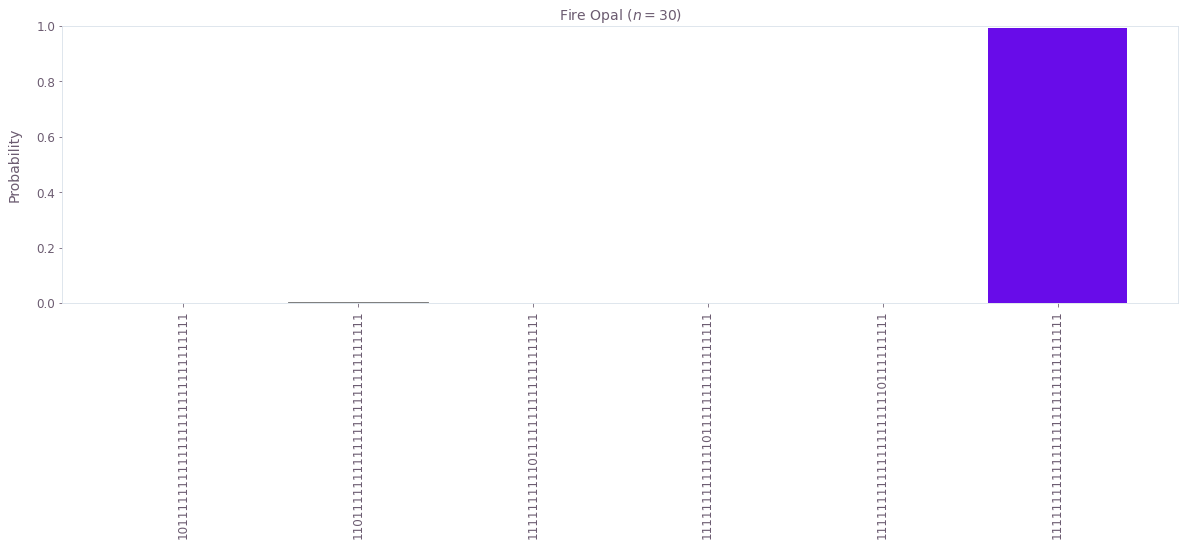

In [47]:
print(f"Success probability: {100 * bitstring_results[hidden_string]:.2f}%")
plot_bv_results(
    bitstring_results,
    hidden_string=hidden_string,
    title="Fire Opal ($n=30$)",
    max_columns=100,
)

### 7. Compare results without Fire Opal

To get a true comparison, let's run the same circuit without Fire Opal. We'll run the circuit using Amazon Braket SDK on the same [IonQ backend](https://docs.aws.amazon.com/braket/latest/developerguide/braket-devices.html) as used previously to get a one-to-one comparison.

In [ ]:
device = AwsDevice(arn="arn:aws:braket:us-east-1::device/qpu/ionq/Forte-1")

In [28]:
ionq_job = device.run(circuit, shots=shot_count)

You may retrieve the results from AWS Braket based on the [task.id](https://docs.aws.amazon.com/braket/latest/developerguide/braket-monitor-tasks-sdk.html) using the following code: 

In [ ]:
from braket.aws import AwsSession, AwsQuantumTask

# Restore task with unique arn
task_load = AwsQuantumTask("TASK_ID")
# Retrieve the result of the task
result = task_load.result()
counts = result.measurement_counts
aws_probabilities_ancilla = bitstring_count_to_probabilities(counts, shot_count, n)
aws_probabilities = {
    key[:-1]: value for key, value in aws_probabilities_ancilla.items()
}

With the probabilities calculated, you can look at the outputs of the device execution without Fire Opal

Success probability: 86.23%


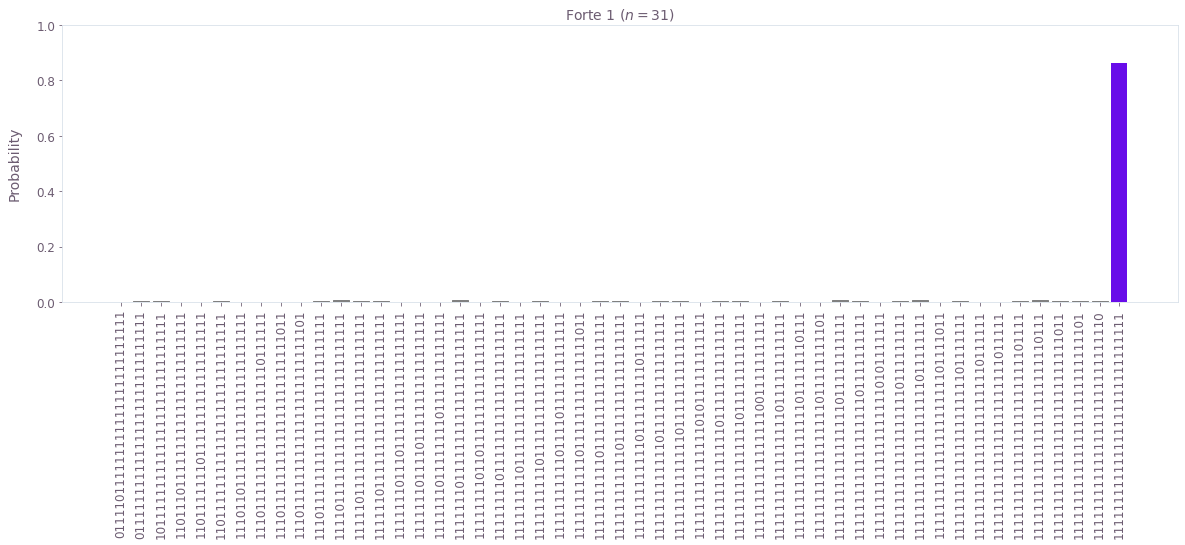

In [62]:
print(f"Success probability: {100 * aws_probabilities[hidden_string]:.2f}%")
plot_bv_results(
    aws_probabilities,
    hidden_string=hidden_string,
    title=f"{device.name} ($n=31$)",
    max_columns=100,
)

The above results demonstrate that noise has impacted the probability of obtaining the correct hidden string as the output. In this case, the string returned with the greatest frequency by the quantum computer is the expected `111 111 111 111 111 111 111 111 111 111` state, but with a lower probability. We should also take note of the amount of incorrect states that now contain non-zero return probabilities. 

You can confirm Fire Opal improves the probability of a successful outcome by comparing the success ratio between Fire Opal and the default configuration.

In [64]:
fire_opal_success = bitstring_results[hidden_string]
aws_success = aws_probabilities[hidden_string]

if aws_success != 0:
    factor = fire_opal_success / aws_success
    print(f"Fire Opal improved success probability by a factor of {factor:.3f}!")
else:
    print("Fire Opal improved success probability by a factor of >1000X")

Fire Opal improved success probability by a factor of 1.151!


Congratulations! You've run your first algorithm with Fire Opal and demonstrated its ability in enhancing a device performance.

The package versions below were used to produce this notebook.

In [29]:
from fireopal import print_package_versions

print_package_versions()

| Package               | Version |
| --------------------- | ------- |
| Python                | 3.10.16 |
| matplotlib            | 3.9.3   |
| networkx              | 2.8.8   |
| numpy                 | 1.26.4  |
| sympy                 | 1.12.1  |
| fire-opal             | 8.4.0   |
| qctrl-visualizer      | 8.0.2   |
| qctrl-workflow-client | 5.4.0   |
